# How are in-demand skills trending for the top 3 entry level data roles?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filtering Data
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
filtered_dfs = []

for title in job_titles:
    filtered_df = df[(df['job_title_short'] == title) & (df['job_country'] == 'United States')].copy()
    filtered_df['job_posted_month_no'] = filtered_df['job_posted_date'].dt.month
    filtered_dfs.append(filtered_df)

# Concatenating Data
df_concat = pd.concat(filtered_dfs, ignore_index=True)
df_concat_explode = df_concat.explode('job_skills')
df_concat_explode['job_skills'].value_counts()
df_concat_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
0,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
1,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
1,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
2,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
2,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161724,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,alteryx,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
161724,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,power bi,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
161724,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,tableau,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8
161724,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,qlik,"{'analyst_tools': ['alteryx', 'power bi', 'tab...",8


In [3]:
# Calculating the number of job postings per month
df_concat_pivot = df_concat_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_concat_pivot.loc['Total'] = df_concat_pivot.sum()

# Sorting the columns by the total number of job postings
df_concat_pivot = df_concat_pivot[df_concat_pivot.loc['Total'].sort_values(ascending=False).index]
df_concat_pivot = df_concat_pivot.drop('Total')
df_concat_pivot


job_skills,sql,python,r,tableau,excel,sas,aws,spark,azure,power bi,...,ionic,msaccess,ocaml,mattermost,fastify,gtx,capacitor,symfony,microsoft lists,fedora
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,10197,9242,5106,4475,4491,3642,2883,2442,2021,2184,...,0,0,0,0,0,0,1,1,0,0
2,7947,7379,3680,3362,3327,2526,2583,2063,1825,1867,...,0,0,0,0,0,0,0,0,0,0
3,7856,7203,3677,3399,3385,2558,2612,1924,1809,1815,...,0,0,0,0,0,0,0,0,0,0
4,7597,7169,3519,3413,3314,2644,2421,1839,1708,1801,...,1,0,0,0,0,0,0,0,0,0
5,6951,6604,3227,3105,2778,2286,2259,1815,1693,1734,...,0,1,0,0,0,0,0,0,0,0
6,7352,6922,3396,3163,3038,2284,2359,1888,1755,1842,...,0,0,0,0,0,0,0,0,0,0
7,6877,6668,3306,3147,2807,2228,2300,1740,1629,1651,...,0,0,0,0,0,1,0,0,0,1
8,8984,8746,4445,3972,3638,3004,2813,2219,1980,2130,...,0,0,0,0,0,0,0,0,0,0
9,6540,6275,2770,2702,2511,2136,2229,1756,1708,1492,...,0,0,0,0,0,0,0,0,0,0


# Plot of Job Postings for Entry Level Data Roles by Skills

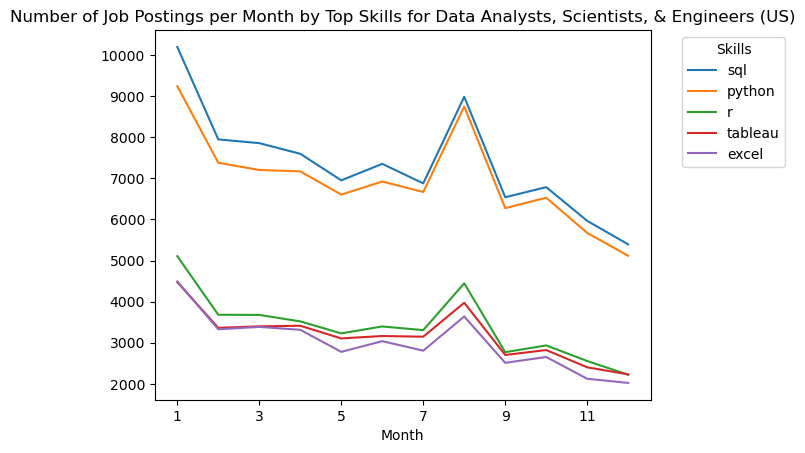

In [4]:
df_concat_pivot.iloc[:, :5].plot(kind='line')
plt.title('Number of Job Postings per Month by Top Skills for Data Analysts, Scientists, & Engineers (US)')
plt.xlabel('Month')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
# Calculate the percentage of each skill in each month

df_concat_totals = df_concat.groupby('job_posted_month_no').size()
df_concat_perc = df_concat_pivot.div(df_concat_totals/100, axis=0)
df_concat_perc


job_skills,sql,python,r,tableau,excel,sas,aws,spark,azure,power bi,...,ionic,msaccess,ocaml,mattermost,fastify,gtx,capacitor,symfony,microsoft lists,fedora
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,56.449291,51.162533,28.266165,24.773029,24.861603,20.161647,15.959920,13.518601,11.187998,12.090345,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.005536,0.005536,0.000000,0.000000
2,56.202263,52.185290,26.025460,23.776521,23.528996,17.864215,18.267327,14.589816,12.906648,13.203678,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,55.401975,50.796897,25.930889,23.970381,23.871650,18.039492,18.420310,13.568406,12.757405,12.799718,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,55.383830,52.263614,25.654298,24.881534,24.159802,19.275352,17.649632,13.406722,12.451702,13.129693,...,0.00729,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,56.301636,53.491009,26.138020,25.149846,22.501215,18.516119,18.297424,14.701118,13.712943,14.045035,...,0.00000,0.0081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,55.608502,52.356100,25.686408,23.924060,22.978595,17.275546,17.842826,14.280312,13.274336,13.932380,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,54.376532,52.723966,26.140587,24.883372,22.194987,17.616826,18.186131,13.758204,12.880525,13.054479,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.007907,0.000000,0.000000,0.000000,0.007907
8,55.384995,53.917761,27.402750,24.486776,22.427717,18.519204,17.341718,13.679798,12.206399,13.131126,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,52.610409,50.478642,22.283002,21.735983,20.199501,17.182849,17.930979,14.125975,13.739844,12.002252,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Formatting months
df_concat_perc = df_concat_perc.reset_index()
df_concat_perc['job_posted_month_no'] = df_concat_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_concat_perc = df_concat_perc.set_index('job_posted_month_no')
df_concat_perc

job_skills,sql,python,r,tableau,excel,sas,aws,spark,azure,power bi,...,ionic,msaccess,ocaml,mattermost,fastify,gtx,capacitor,symfony,microsoft lists,fedora
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
Jan,56.449291,51.162533,28.266165,24.773029,24.861603,20.161647,15.959920,13.518601,11.187998,12.090345,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.005536,0.005536,0.000000,0.000000
Feb,56.202263,52.185290,26.025460,23.776521,23.528996,17.864215,18.267327,14.589816,12.906648,13.203678,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,55.401975,50.796897,25.930889,23.970381,23.871650,18.039492,18.420310,13.568406,12.757405,12.799718,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,55.383830,52.263614,25.654298,24.881534,24.159802,19.275352,17.649632,13.406722,12.451702,13.129693,...,0.00729,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.301636,53.491009,26.138020,25.149846,22.501215,18.516119,18.297424,14.701118,13.712943,14.045035,...,0.00000,0.0081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,55.608502,52.356100,25.686408,23.924060,22.978595,17.275546,17.842826,14.280312,13.274336,13.932380,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,54.376532,52.723966,26.140587,24.883372,22.194987,17.616826,18.186131,13.758204,12.880525,13.054479,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.007907,0.000000,0.000000,0.000000,0.007907
Aug,55.384995,53.917761,27.402750,24.486776,22.427717,18.519204,17.341718,13.679798,12.206399,13.131126,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,52.610409,50.478642,22.283002,21.735983,20.199501,17.182849,17.930979,14.125975,13.739844,12.002252,...,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Plot of All Entry Level Data Skills Probability Trending

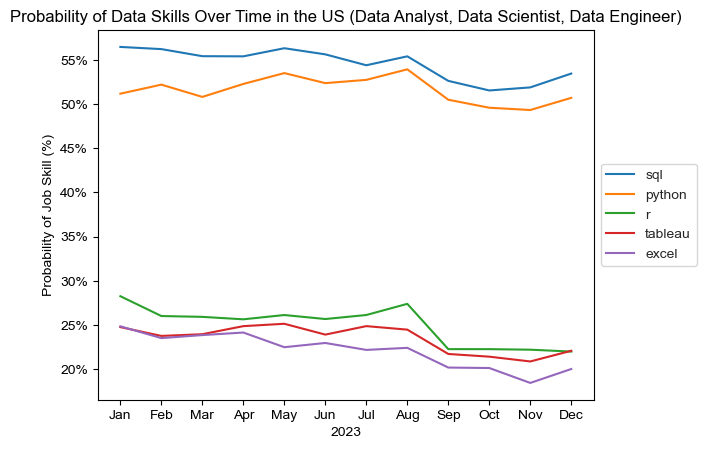

In [7]:
df_plot = df_concat_perc.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_style('ticks')
plt.title('Probability of Data Skills Over Time in the US (Data Analyst, Data Scientist, Data Engineer)')
plt.xlabel('2023')
plt.ylabel('Probability of Job Skill (%)')

# Fixing the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding percentage to y-axis
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


# Plot of Data Analyst Skills Probability Trending

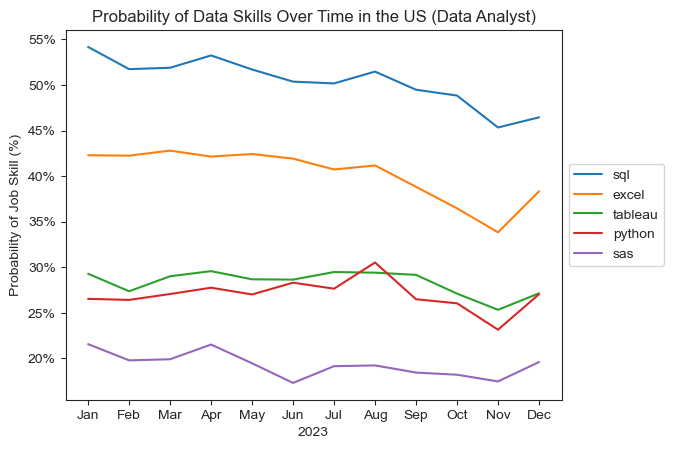

In [8]:
# Do the same but for Data Analysts only
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')
df_da_totals = df_da.groupby('job_posted_month_no').size()
df_da_perc = df_da_pivot.div(df_da_totals/100, axis=0)
df_da_perc = df_da_perc.reset_index()
df_da_perc['job_posted_month_no'] = df_da_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_da_perc = df_da_perc.set_index('job_posted_month_no')

sns.lineplot(data=df_da_perc.iloc[:, :5], dashes=False, palette='tab10')
sns.set_style('ticks')
plt.title('Probability of Data Skills Over Time in the US (Data Analyst)')
plt.xlabel('2023')
plt.ylabel('Probability of Job Skill (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()


## Subplot of Probability of Top 5 Skills for each of the Entry Level Data Roles in the US

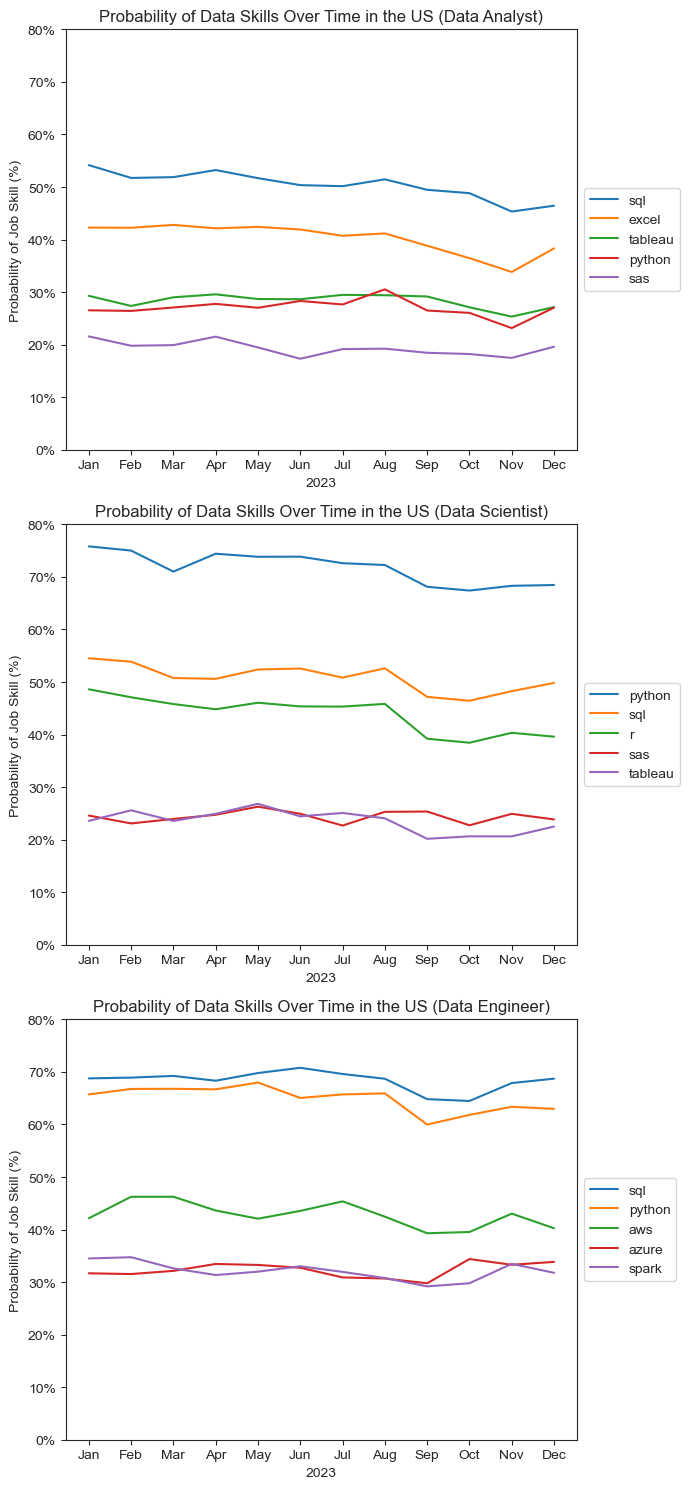

In [25]:
fig, axes = plt.subplots(nrows=len(job_titles), figsize=(7, 15))

for i, title in enumerate(job_titles):
	ax = axes[i]
	
	# Filter the DataFrame for the current job title and country
	df_filtered = df[(df['job_title_short'] == title) & (df['job_country'] == 'United States')].copy()
	
	# Extract the month number from the job posted date
	df_filtered['job_posted_month_no'] = df_filtered['job_posted_date'].dt.month
	
    # Create a pivot table of exploded job skills
	df_filtered_explode = df_filtered.explode('job_skills')
	df_pivot = df_filtered_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

	# Calculate the total counts for each skill then sort them by the totals
	df_pivot.loc['Total'] = df_pivot.sum()
	df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
	df_pivot = df_pivot.drop('Total')

	# Calculate the total counts for each month
	df_totals = df_filtered.groupby('job_posted_month_no').size()

	# Calculate the percentage for each skill
	df_perc = df_pivot.div(df_totals / 100, axis=0)
	df_perc = df_perc.reset_index()
	
    # Format months
	df_perc['job_posted_month_no'] = df_perc['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
	
    # Get the top 5 skills
	df_perc = df_perc.set_index('job_posted_month_no')
	df_plot = df_perc.iloc[:, :5]
	
	sns.lineplot(data=df_plot, dashes=False, palette='tab10', ax=ax)
	sns.set_style('ticks')
	ax.set_title(f'Probability of Data Skills Over Time in the US ({title})')
	ax.set_xlabel('2023')
	ax.set_ylabel('Probability of Job Skill (%)')
	ax.set_ylim(0, 80)
	ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
	ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()